In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as sp
import statsmodels.api as sm
import statsmodels.tsa.arima_model as ts

<font size = '6'> **Datasets** </font>

In [11]:
offense = pd.read_csv('https://raw.githubusercontent.com/weiyut/Sports-Analytics/main/The%20Juiced%20Ball%20Theory/Data/TeamStats.csv', usecols=[1,2,3,4,5])
record = pd.read_csv('https://raw.githubusercontent.com/weiyut/Sports-Analytics/main/The%20Juiced%20Ball%20Theory/Data/Leaderboard.csv')

print(offense.head())
print(record.head())

   Year   R/G    HR    SO    ISO
0  1921  4.85  0.38  2.83  0.112
1  1922  4.87  0.43  2.81  0.113
2  1923  4.81  0.40  2.85  0.107
3  1924  4.76  0.36  2.70  0.107
4  1925  5.13  0.48  2.71  0.119
   Season    HR    BB%     K%    ISO    AVG    OBP    SLG    OPS  GB/FB  HR/FB
0    1921   937  7.20%  7.30%  0.112  0.291  0.348  0.403  0.750    NaN    NaN
1    1922  1055  7.50%  7.20%  0.113  0.288  0.348  0.401  0.749    NaN    NaN
2    1923   980  7.90%  7.30%  0.107  0.284  0.347  0.391  0.738    NaN    NaN
3    1924   896  7.70%  7.00%  0.108  0.287  0.348  0.394  0.742    NaN    NaN
4    1925  1169  8.00%  6.90%  0.119  0.292  0.354  0.411  0.765    NaN    NaN


<font size = '6'> **HomeRuns Trend** </font>

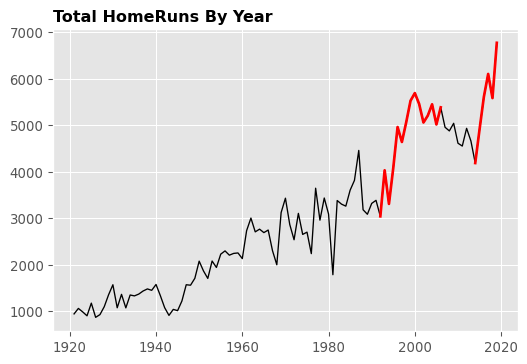

In [12]:
my_dpi=96
plt.style.use('ggplot')
plt.figure(figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)
plt.plot(record['Season'],record['HR'], color = 'black', linewidth=1)
plt.plot(record['Season'][71:86],record['HR'][71:86], color = 'red', linewidth=2)
plt.plot(record['Season'][93:99],record['HR'][93:99], color = 'red', linewidth=2)
plt.title("Total HomeRuns By Year", loc='left', fontsize=12, color='black',weight = 'bold')
plt.show()

Text(0.0, 1.0, 'HomeRuns per Games By Year')

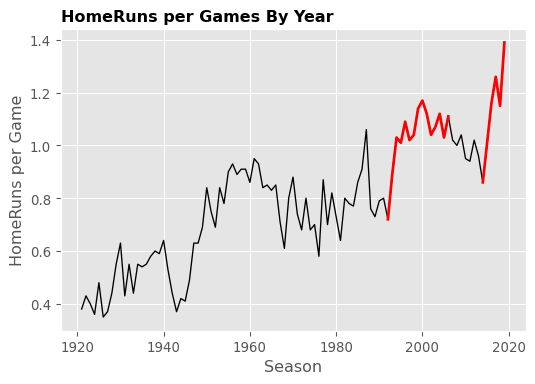

In [4]:
my_dpi=96
plt.style.use('ggplot')
plt.figure(figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)
plt.plot(offense['Year'],offense['HR'], color = 'black', linewidth=1)
plt.plot(offense['Year'][71:86],offense['HR'][71:86], color = 'red', linewidth=2)
plt.plot(offense['Year'][93:99],offense['HR'][93:99], color = 'red', linewidth=2)
plt.xlabel('Season')
plt.ylabel('HomeRuns per Game')
plt.title("HomeRuns per Games By Year", loc='left', fontsize=12, color='black',weight = 'bold')

In [14]:
Personal_Record = pd.read_csv('https://raw.githubusercontent.com/weiyut/Sports-Analytics/main/The%20Juiced%20Ball%20Theory/Data/SepYear.csv')
Personal_Record.head()

,playerID,yearID,AB,H,2B,3B,HR,BB,SO
0,aardsda01,2010,0,0,0,0,0,0,0
1,abadfe01,2010,1,0,0,0,0,0,1
2,abreubo01,2010,573,146,41,1,20,87,132
3,abreuto01,2010,193,45,11,1,1,4,47
4,accarje01,2010,0,0,0,0,0,0,0


In [6]:
##Personal_Record['HR'] = Personal_Record['HR'].astype('category',copy=False)
##Personal_Record.dtypes

In [15]:
Record_From_2010_to_2014 = Personal_Record.loc[(Personal_Record['yearID']<2015)&(Personal_Record['AB']>=200)]
Record_From_2015_to_2019 = Personal_Record.loc[(Personal_Record['yearID']>=2015)&(Personal_Record['AB']>=200)]

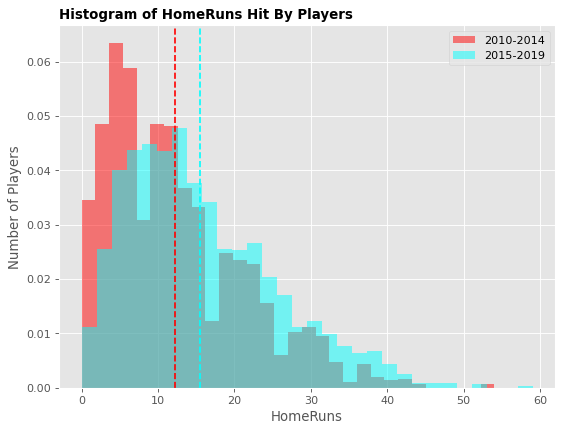

In [20]:
plt.figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
plt.hist(Record_From_2010_to_2014['HR'],bins = 30, alpha = 0.5, label = '2010-2014', color ='red',density = True)
plt.hist(Record_From_2015_to_2019['HR'],bins = 30, alpha = 0.5, label = '2015-2019',color = 'cyan', density = True)
plt.legend(loc='upper right')
plt.title("Histogram of HomeRuns Hit By Players", loc='left', fontsize=12, color='black',weight = 'bold')
plt.axvline(Record_From_2010_to_2014['HR'].mean(),color = 'red',linestyle = '--')
plt.axvline(Record_From_2015_to_2019['HR'].mean(),color = 'cyan',linestyle = '--')
plt.xlabel('HomeRuns')
plt.ylabel('Number of Players')
plt.show()

In [21]:
Mann_Whitney_stat, p_value = st.mannwhitneyu(Record_From_2010_to_2014['HR'],Record_From_2015_to_2019['HR'],use_continuity = True, alternative = 'two-sided')
print('Statistics:',Mann_Whitney_stat,' ','P-value:',p_value)

Statistics: 1079706.5   P-value: 6.277642436288664e-23


<font size = '6'> **Time Series Analysis** </font>


<font size = '5.5'> **Model Building** </font>


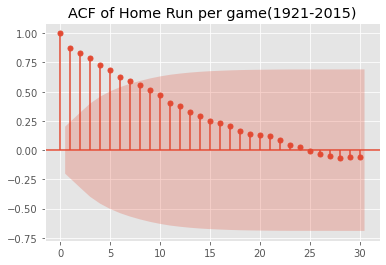

In [22]:
sm.graphics.tsa.plot_acf(offense['HR'][0:95], lags=30);
plt.title('ACF of Home Run per game(1921-2015)');

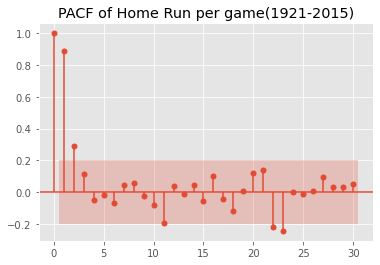

In [23]:
sm.graphics.tsa.plot_pacf(offense['HR'][0:95], lags=30);
plt.title('PACF of Home Run per game(1921-2015)');

In [24]:
BoxCox_HR_1921_to_2015, lambda_1921_to_2015 = st.boxcox(offense['HR'][0:95])

Text(0, 0.5, 'Transformed Data')

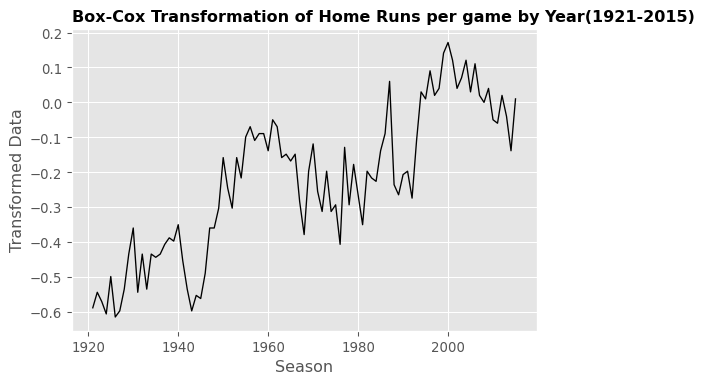

In [25]:
my_dpi=96
plt.figure(figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)
plt.plot(record['Season'][0:95],BoxCox_HR_1921_to_2015, color = 'black', linewidth=1)
plt.title("Box-Cox Transformation of Home Runs per game by Year(1921-2015)", loc='left', fontsize=12, color='black',weight = 'bold')
plt.xlabel('Season')
plt.ylabel('Transformed Data')

Text(0, 0.5, 'Transformed Value')

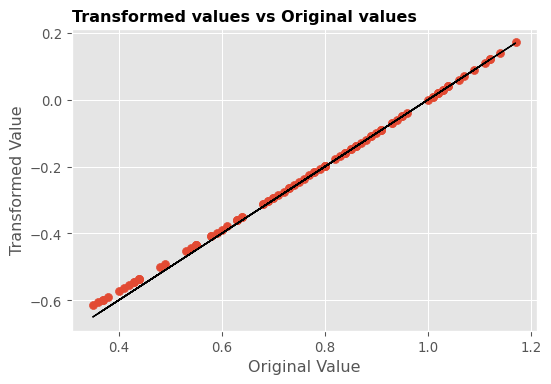

In [26]:
my_dpi=96
plt.figure(figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)
plt.plot(offense['HR'][0:95],offense['HR'][0:95]-1, color = 'black', linewidth=1)
plt.scatter(offense['HR'][0:95],BoxCox_HR_1921_to_2015)
plt.title("Transformed values vs Original values", loc='left', fontsize=12, color='black',weight = 'bold')
plt.xlabel('Original Value')
plt.ylabel('Transformed Value')

Text(0, 0.5, 'Transformed Data')

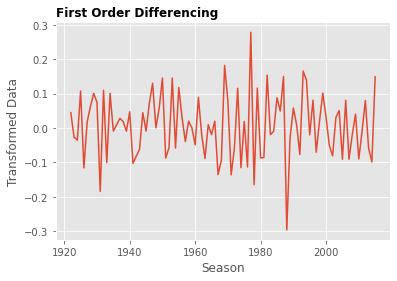

In [27]:
plt.plot(record['Season'][1:95],np.diff(BoxCox_HR_1921_to_2015))
plt.title("First Order Differencing", loc='left', fontsize=12, color='black',weight = 'bold')
plt.xlabel('Season')
plt.ylabel('Transformed Data')

<font size = '5'> **AR(2)** </font>

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Model_1 = SARIMAX(BoxCox_HR_1921_to_2015, order = (2,1,0))
results_Model_1 = Model_1.fit()
print(results_Model_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   95
Model:               SARIMAX(2, 1, 0)   Log Likelihood                  95.512
Date:                Sat, 11 Sep 2021   AIC                           -185.023
Time:                        00:34:19   BIC                           -177.393
Sample:                             0   HQIC                          -181.941
                                 - 95                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3814      0.087     -4.387      0.000      -0.552      -0.211
ar.L2         -0.1883      0.109     -1.731      0.083      -0.401       0.025
sigma2         0.0077      0.001      6.363      0.0

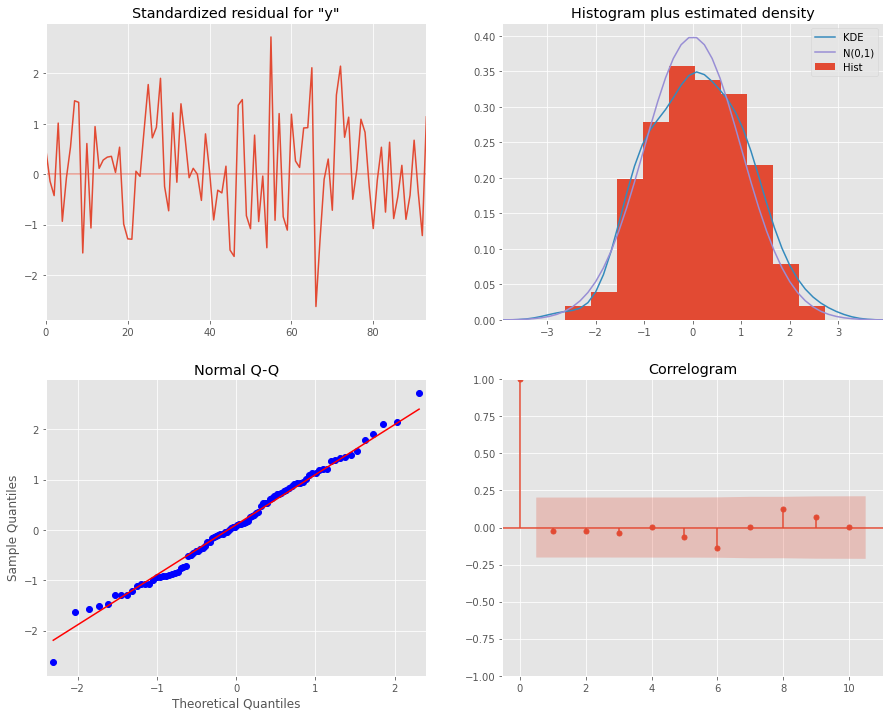

In [30]:
results_Model_1.plot_diagnostics(figsize=(15,12));

In [31]:
forecast_Model_1 = results_Model_1.get_forecast(steps=4)
predicted_value_Model_1 = forecast_Model_1.predicted_mean
conf_int_Model_1_95 = forecast_Model_1.conf_int(alpha = 0.05)
conf_int_Model_1_90 = forecast_Model_1.conf_int(alpha = 0.10)
conf_int_Model_1_80 = forecast_Model_1.conf_int(alpha = 0.20)

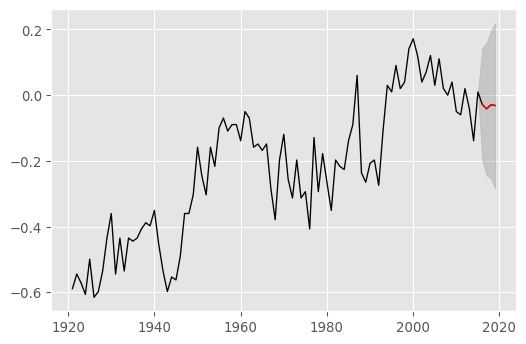

In [32]:
my_dpi=96
plt.figure(figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)
plt.plot(record['Season'][0:99],np.concatenate([BoxCox_HR_1921_to_2015,predicted_value_Model_1]), color = 'black', linewidth=1)
plt.plot(record['Season'][95:99],predicted_value_Model_1, color = 'red', linewidth=1)
plt.fill_between(record['Season'][94:99],np.concatenate([np.array([BoxCox_HR_1921_to_2015[94]]),conf_int_Model_1_95[:,0]]),np.concatenate([np.array([BoxCox_HR_1921_to_2015[94]]),conf_int_Model_1_95[:,1]]),color = 'gray',alpha=0.3)

In [33]:
sp.inv_boxcox(conf_int_Model_1_95,lambda_1921_to_2015)

array([[0.79758646, 1.14216215],
       [0.75251792, 1.15856809],
       [0.74154549, 1.19303676],
       [0.71093478, 1.21750583]])

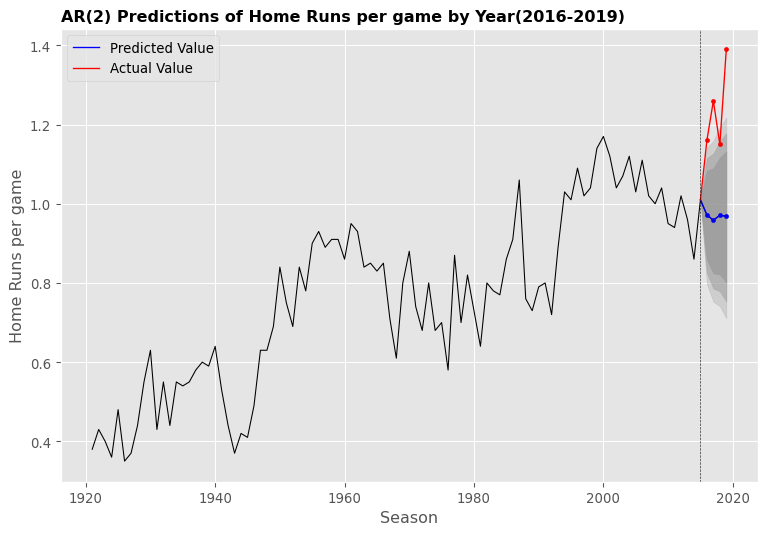

In [21]:
my_dpi=96
plt.figure(figsize=(900/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.plot(record['Season'][0:99],np.concatenate([offense['HR'][0:95],sp.inv_boxcox(predicted_value_Model_1,lambda_1921_to_2015)]), color = 'black', linewidth=0.8)
plt.plot(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(predicted_value_Model_1,lambda_1921_to_2015)]), color = 'blue', linewidth=1,label='Predicted Value')
plt.plot(record['Season'][94:99],offense['HR'][94:99], color = 'red', linewidth=1,label='Actual Value')
plt.fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_95,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_95,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.3)
plt.fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_90,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_90,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.5)
plt.fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_80,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_80,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.7)
plt.scatter(record['Season'][95:99],sp.inv_boxcox(predicted_value_Model_1,lambda_1921_to_2015),color = "blue",s = 9)
plt.scatter(record['Season'][95:99],offense['HR'][95:99],color = "red",s = 9)
plt.axvline(record['Season'][94],color='black',linestyle = '--',linewidth = 0.5, alpha = 0.8)
plt.title("AR(2) Predictions of Home Runs per game by Year(2016-2019)", loc='left', fontsize=12, color='black',weight = 'bold')
plt.xlabel('Season')
plt.ylabel('Home Runs per game')
plt.legend(loc='upper left')

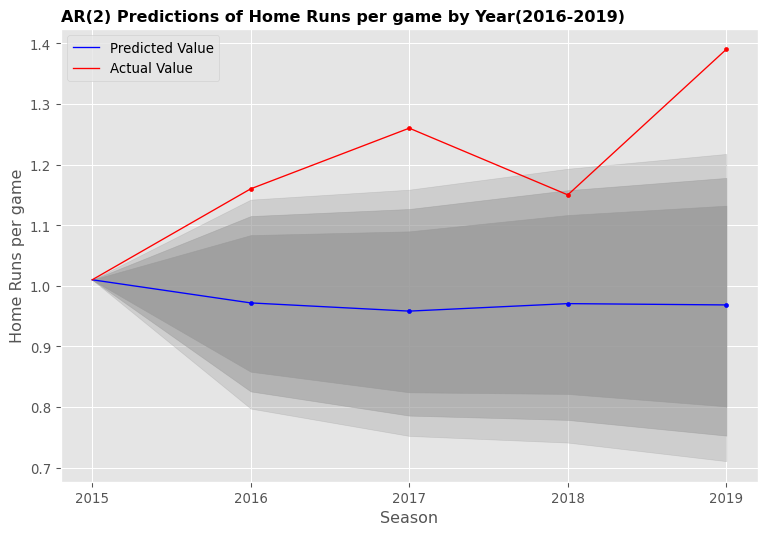

In [34]:
my_dpi=96
plt.figure(figsize=(900/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.plot(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(predicted_value_Model_1,lambda_1921_to_2015)]), color = 'blue', linewidth=1,label='Predicted Value')
plt.plot(record['Season'][94:99],offense['HR'][94:99], color = 'red', linewidth=1,label='Actual Value')
plt.fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_95,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_95,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.3)
plt.fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_90,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_90,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.5)
plt.fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_80,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_80,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.7)
plt.scatter(record['Season'][95:99],sp.inv_boxcox(predicted_value_Model_1,lambda_1921_to_2015),color = "blue",s = 9)
plt.scatter(record['Season'][95:99],offense['HR'][95:99],color = "red",s = 9)
plt.title("AR(2) Predictions of Home Runs per game by Year(2016-2019)", loc='left', fontsize=12, color='black',weight = 'bold')
plt.xlabel('Season')
plt.ylabel('Home Runs per game')
plt.legend(loc='upper left')
plt.xticks(np.arange(2015,2020));

<font size = '5'> **AR(1)** </font>

In [35]:
Model_1_B = SARIMAX(BoxCox_HR_1921_to_2015, order = (1,1,0))
results_Model_1_B = Model_1_B.fit()
print(results_Model_1_B.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   95
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  93.836
Date:                Sat, 11 Sep 2021   AIC                           -183.673
Time:                        00:34:42   BIC                           -178.586
Sample:                             0   HQIC                          -181.618
                                 - 95                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3231      0.086     -3.774      0.000      -0.491      -0.155
sigma2         0.0079      0.001      6.454      0.000       0.006       0.010
Ljung-Box (L1) (Q):                   0.47   Jarque-

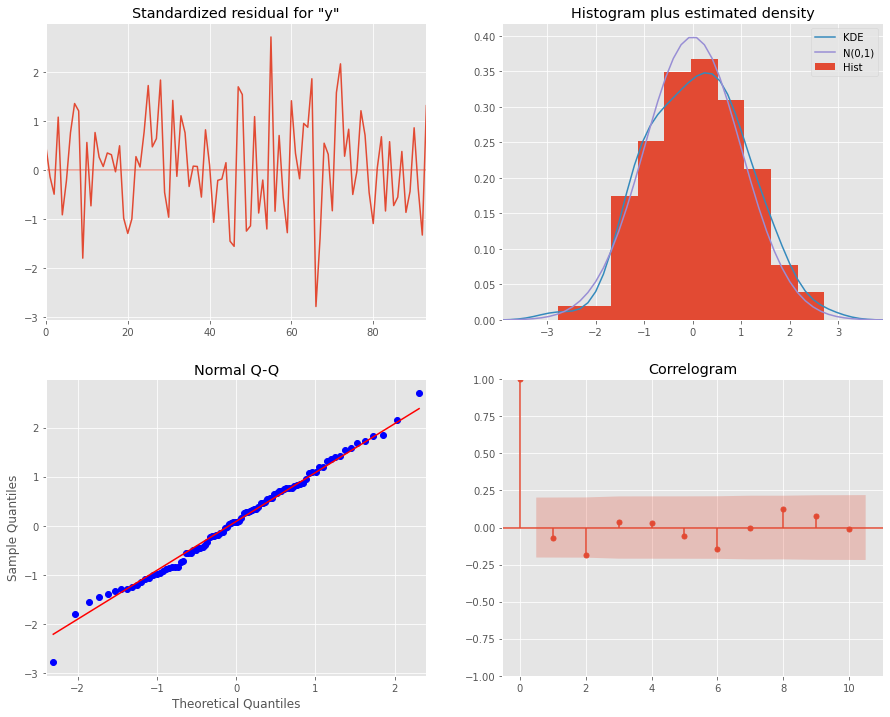

In [24]:
results_Model_1_B.plot_diagnostics(figsize=(15,12));

In [36]:
forecast_Model_1_B = results_Model_1_B.get_forecast(steps=4)
predicted_value_Model_1_B = forecast_Model_1_B.predicted_mean
conf_int_Model_1_B_95 = forecast_Model_1_B.conf_int(alpha = 0.05)
conf_int_Model_1_B_90 = forecast_Model_1_B.conf_int(alpha = 0.10)
conf_int_Model_1_B_80 = forecast_Model_1_B.conf_int(alpha = 0.20)

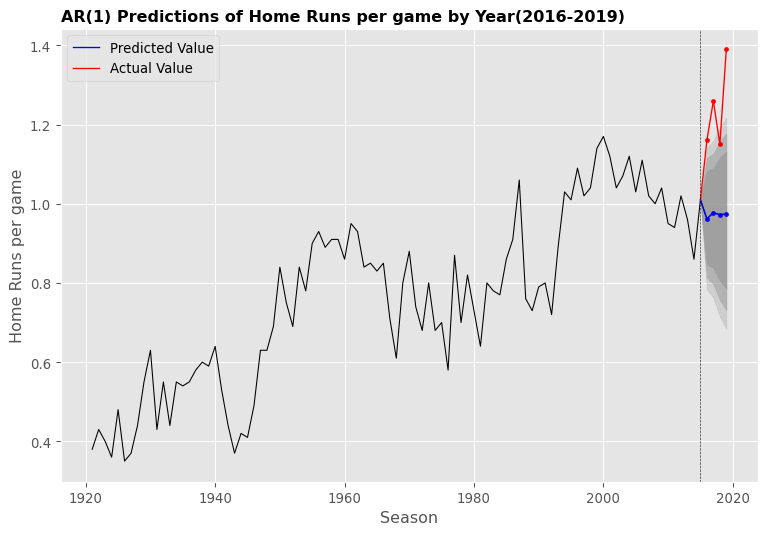

In [26]:
my_dpi=96
plt.figure(figsize=(900/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.plot(record['Season'][0:99],np.concatenate([offense['HR'][0:95],sp.inv_boxcox(predicted_value_Model_1_B,lambda_1921_to_2015)]), color = 'black', linewidth=0.8)
plt.plot(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(predicted_value_Model_1_B,lambda_1921_to_2015)]), color = 'blue', linewidth=1,label='Predicted Value')
plt.plot(record['Season'][94:99],offense['HR'][94:99], color = 'red', linewidth=1,label='Actual Value')
plt.fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_95,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_95,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.3)
plt.fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_90,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_90,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.5)
plt.fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_80,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_80,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.7)
plt.scatter(record['Season'][95:99],sp.inv_boxcox(predicted_value_Model_1_B,lambda_1921_to_2015),color = "blue",s = 9)
plt.scatter(record['Season'][95:99],offense['HR'][95:99],color = "red",s = 9)
plt.axvline(record['Season'][94],color='black',linestyle = '--',linewidth = 0.5, alpha = 0.8)
plt.title("AR(1) Predictions of Home Runs per game by Year(2016-2019)", loc='left', fontsize=12, color='black',weight = 'bold')
plt.xlabel('Season')
plt.ylabel('Home Runs per game')
plt.legend(loc='upper left')

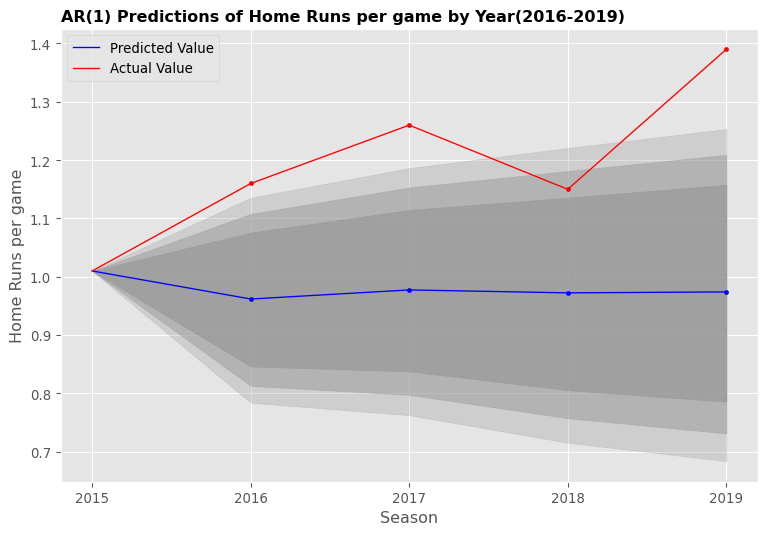

In [37]:
my_dpi=96
plt.figure(figsize=(900/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.plot(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(predicted_value_Model_1_B,lambda_1921_to_2015)]), color = 'blue', linewidth=1,label='Predicted Value')
plt.plot(record['Season'][94:99],offense['HR'][94:99], color = 'red', linewidth=1,label='Actual Value')
plt.fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_95,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_95,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.3)
plt.fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_90,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_90,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.5)
plt.fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_80,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_80,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.7)
plt.scatter(record['Season'][95:99],sp.inv_boxcox(predicted_value_Model_1_B,lambda_1921_to_2015),color = "blue",s = 9)
plt.scatter(record['Season'][95:99],offense['HR'][95:99],color = "red",s = 9)
plt.title("AR(1) Predictions of Home Runs per game by Year(2016-2019)", loc='left', fontsize=12, color='black',weight = 'bold')
plt.xlabel('Season')
plt.ylabel('Home Runs per game')
plt.legend(loc='upper left')
plt.xticks(np.arange(2015,2020));

<font size = '5'> **Iteration** </font>

<font size = '4'> **ACF and PACF** </font>

<font size = '3.5'> **1921-2016** </font>

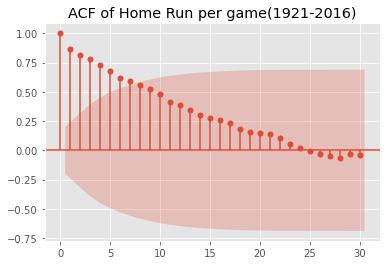

In [38]:
sm.graphics.tsa.plot_acf(offense['HR'][0:96], lags=30);
plt.title('ACF of Home Run per game(1921-2016)');

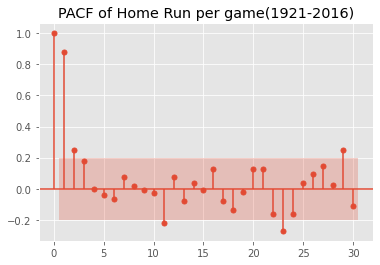

In [29]:
sm.graphics.tsa.plot_pacf(offense['HR'][0:96], lags=30);
plt.title('PACF of Home Run per game(1921-2016)');

<font size = '3.5'> **1921-2017** </font>

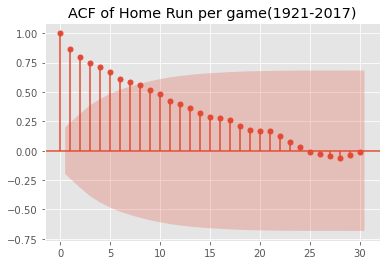

In [30]:
sm.graphics.tsa.plot_acf(offense['HR'][0:97], lags=30);
plt.title('ACF of Home Run per game(1921-2017)');

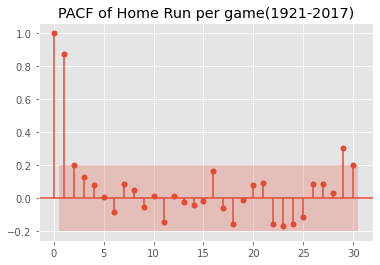

In [31]:
sm.graphics.tsa.plot_pacf(offense['HR'][0:97], lags=30);
plt.title('PACF of Home Run per game(1921-2017)');

<font size = '3.5'> **1921-2018** </font>

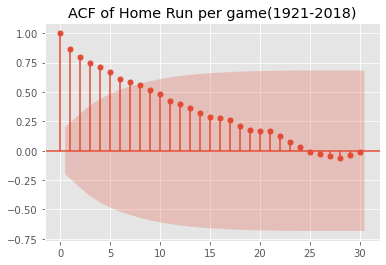

In [32]:
sm.graphics.tsa.plot_acf(offense['HR'][0:97], lags=30);
plt.title('ACF of Home Run per game(1921-2018)');

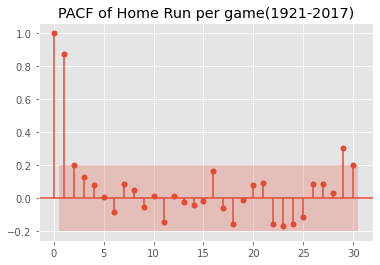

In [33]:
sm.graphics.tsa.plot_pacf(offense['HR'][0:97], lags=30);
plt.title('PACF of Home Run per game(1921-2017)');

<font size = '4'> **Modeling** </font>

<font size = '3.5'> **1921-2016** </font>


<font size = '3.5'> **ARIMA(2,1,0)** </font>

In [34]:
BoxCox_HR_1921_to_2016, lambda_1921_to_2016 = st.boxcox(offense['HR'][0:96])
Model_2_A = SARIMAX(BoxCox_HR_1921_to_2016, order = (2,1,0))
results_Model_2_A = Model_2_A.fit()
print(results_Model_2_A.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(2, 1, 0)   Log Likelihood                  94.205
Date:                Wed, 07 Jul 2021   AIC                           -182.409
Time:                        13:45:08   BIC                           -174.748
Sample:                             0   HQIC                          -179.313
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3520      0.088     -3.990      0.000      -0.525      -0.179
ar.L2         -0.1997      0.110     -1.817      0.069      -0.415       0.016
sigma2         0.0080      0.001      6.365      0.0

<font size = '3.5'> **ARIMA(1,1,0)** </font>

In [35]:
Model_2_B = SARIMAX(BoxCox_HR_1921_to_2016, order = (1,1,0))
results_Model_2_B = Model_2_B.fit()
print(results_Model_2_B.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  92.381
Date:                Wed, 07 Jul 2021   AIC                           -180.762
Time:                        13:45:46   BIC                           -175.654
Sample:                             0   HQIC                          -178.698
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2882      0.086     -3.371      0.001      -0.456      -0.121
sigma2         0.0084      0.001      6.530      0.000       0.006       0.011
Ljung-Box (L1) (Q):                   0.43   Jarque-

<font size = '3.5'> **1921-2017** </font>

<font size = '3.5'> **ARIMA(2,1,0)** </font>

In [36]:
BoxCox_HR_1921_to_2017, lambda_1921_to_2017 = st.boxcox(offense['HR'][0:97])
Model_3_A = SARIMAX(BoxCox_HR_1921_to_2017, order = (2,1,0))
results_Model_3_A = Model_3_A.fit()
print(results_Model_3_A.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   97
Model:               SARIMAX(2, 1, 0)   Log Likelihood                  91.670
Date:                Wed, 07 Jul 2021   AIC                           -177.341
Time:                        13:48:38   BIC                           -169.648
Sample:                             0   HQIC                          -174.231
                                 - 97                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3099      0.085     -3.624      0.000      -0.477      -0.142
ar.L2         -0.1514      0.105     -1.446      0.148      -0.357       0.054
sigma2         0.0087      0.001      6.342      0.0

<font size = '3.5'> **ARIMA(1,1,0)** </font>

In [40]:
Model_3_B = SARIMAX(BoxCox_HR_1921_to_2017, order = (1,1,0))
results_Model_3_B = Model_3_B.fit()
print(results_Model_3_B.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   97
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  90.593
Date:                Wed, 07 Jul 2021   AIC                           -177.186
Time:                        13:52:41   BIC                           -172.057
Sample:                             0   HQIC                          -175.113
                                 - 97                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2666      0.086     -3.098      0.002      -0.435      -0.098
sigma2         0.0089      0.001      6.423      0.000       0.006       0.012
Ljung-Box (L1) (Q):                   0.29   Jarque-

<font size = '3.5'> **1921-2018** </font>

<font size = '3.5'> **ARIMA(2,1,0)** </font>

In [38]:
BoxCox_HR_1921_to_2018, lambda_1921_to_2018 = st.boxcox(offense['HR'][0:98])
Model_4_A = SARIMAX(BoxCox_HR_1921_to_2018, order = (2,1,0))
results_Model_4_A = Model_4_A.fit()
print(results_Model_4_A.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   98
Model:               SARIMAX(2, 1, 0)   Log Likelihood                  92.894
Date:                Wed, 07 Jul 2021   AIC                           -179.788
Time:                        13:51:56   BIC                           -172.064
Sample:                             0   HQIC                          -176.665
                                 - 98                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3192      0.084     -3.780      0.000      -0.485      -0.154
ar.L2         -0.1630      0.103     -1.584      0.113      -0.365       0.039
sigma2         0.0086      0.001      6.397      0.0

<font size = '3.5'> **ARIMA(1,1,0)** </font>

In [39]:
Model_4_B = SARIMAX(BoxCox_HR_1921_to_2018, order = (1,1,0))
results_Model_4_B = Model_4_B.fit()
print(results_Model_4_B.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   98
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  91.591
Date:                Wed, 07 Jul 2021   AIC                           -179.181
Time:                        13:52:34   BIC                           -174.032
Sample:                             0   HQIC                          -177.099
                                 - 98                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2757      0.085     -3.237      0.001      -0.443      -0.109
sigma2         0.0089      0.001      6.442      0.000       0.006       0.012
Ljung-Box (L1) (Q):                   0.36   Jarque-

<font size = '4'> **Predicted values vs Real values (testing data)** </font>

In [46]:
forecast_Model_2_B = results_Model_2_B.get_forecast(steps=3)
predicted_value_Model_2_B = forecast_Model_2_B.predicted_mean
conf_int_Model_2_B_95 = forecast_Model_2_B.conf_int(alpha = 0.05)
conf_int_Model_2_B_90 = forecast_Model_2_B.conf_int(alpha = 0.10)
conf_int_Model_2_B_80 = forecast_Model_2_B.conf_int(alpha = 0.20)

forecast_Model_3_B = results_Model_3_B.get_forecast(steps=2)
predicted_value_Model_3_B = forecast_Model_3_B.predicted_mean
conf_int_Model_3_B_95 = forecast_Model_3_B.conf_int(alpha = 0.05)
conf_int_Model_3_B_90 = forecast_Model_3_B.conf_int(alpha = 0.10)
conf_int_Model_3_B_80 = forecast_Model_3_B.conf_int(alpha = 0.20)

forecast_Model_4_B = results_Model_4_B.get_forecast(steps=1)
predicted_value_Model_4_B = forecast_Model_4_B.predicted_mean
conf_int_Model_4_B_95 = forecast_Model_4_B.conf_int(alpha = 0.05)
conf_int_Model_4_B_90 = forecast_Model_4_B.conf_int(alpha = 0.10)
conf_int_Model_4_B_80 = forecast_Model_4_B.conf_int(alpha = 0.20)

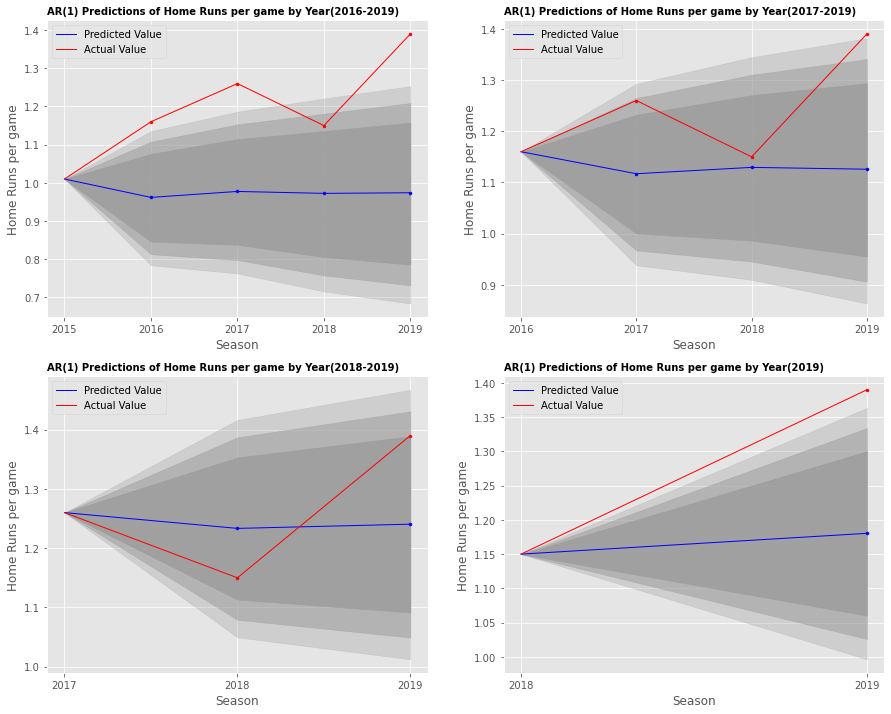

In [76]:
fig, axs = plt.subplots(2,2,figsize = (15,12))

axs[0,0].plot(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(predicted_value_Model_1_B,lambda_1921_to_2015)]), color = 'blue', linewidth=1,label='Predicted Value')
axs[0,0].plot(record['Season'][94:99],offense['HR'][94:99], color = 'red', linewidth=1,label='Actual Value')
axs[0,0].fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_95,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_95,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.3)
axs[0,0].fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_90,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_90,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.5)
axs[0,0].fill_between(record['Season'][94:99],np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_80,lambda_1921_to_2015)[:,0]]),np.concatenate([offense['HR'][94:95],sp.inv_boxcox(conf_int_Model_1_B_80,lambda_1921_to_2015)[:,1]]),color = '#999999',alpha=0.7)
axs[0,0].scatter(record['Season'][95:99],sp.inv_boxcox(predicted_value_Model_1_B,lambda_1921_to_2015),color = "blue",s = 9)
axs[0,0].scatter(record['Season'][95:99],offense['HR'][95:99],color = "red",s = 9)
axs[0,0].set_title("AR(1) Predictions of Home Runs per game by Year(2016-2019)", loc='left', fontsize=10, color='black',weight = 'bold')
axs[0,0].set(ylabel='Home Runs per game', xlabel='Season',xticks=np.arange(2015,2020))
axs[0,0].legend(loc='upper left')

axs[0,1].plot(record['Season'][95:99],np.concatenate([offense['HR'][95:96],sp.inv_boxcox(predicted_value_Model_2_B,lambda_1921_to_2016)]), color = 'blue', linewidth=1,label='Predicted Value')
axs[0,1].plot(record['Season'][95:99],offense['HR'][95:99], color = 'red', linewidth=1,label='Actual Value')
axs[0,1].fill_between(record['Season'][95:99],np.concatenate([offense['HR'][95:96],sp.inv_boxcox(conf_int_Model_2_B_95,lambda_1921_to_2016)[:,0]]),np.concatenate([offense['HR'][95:96],sp.inv_boxcox(conf_int_Model_2_B_95,lambda_1921_to_2016)[:,1]]),color = '#999999',alpha=0.3)
axs[0,1].fill_between(record['Season'][95:99],np.concatenate([offense['HR'][95:96],sp.inv_boxcox(conf_int_Model_2_B_90,lambda_1921_to_2016)[:,0]]),np.concatenate([offense['HR'][95:96],sp.inv_boxcox(conf_int_Model_2_B_90,lambda_1921_to_2016)[:,1]]),color = '#999999',alpha=0.5)
axs[0,1].fill_between(record['Season'][95:99],np.concatenate([offense['HR'][95:96],sp.inv_boxcox(conf_int_Model_2_B_80,lambda_1921_to_2016)[:,0]]),np.concatenate([offense['HR'][95:96],sp.inv_boxcox(conf_int_Model_2_B_80,lambda_1921_to_2016)[:,1]]),color = '#999999',alpha=0.7)
axs[0,1].scatter(record['Season'][96:99],sp.inv_boxcox(predicted_value_Model_2_B,lambda_1921_to_2016),color = "blue",s = 9)
axs[0,1].scatter(record['Season'][96:99],offense['HR'][96:99],color = "red",s = 9);
axs[0,1].set_title("AR(1) Predictions of Home Runs per game by Year(2017-2019)", loc='left', fontsize=10, color='black',weight = 'bold')
axs[0,1].set(ylabel='Home Runs per game', xlabel='Season',xticks=np.arange(2016,2020))
axs[0,1].legend(loc='upper left')

axs[1,0].plot(record['Season'][96:99],np.concatenate([offense['HR'][96:97],sp.inv_boxcox(predicted_value_Model_3_B,lambda_1921_to_2017)]), color = 'blue', linewidth=1,label='Predicted Value')
axs[1,0].plot(record['Season'][96:99],offense['HR'][96:99], color = 'red', linewidth=1,label='Actual Value')
axs[1,0].fill_between(record['Season'][96:99],np.concatenate([offense['HR'][96:97],sp.inv_boxcox(conf_int_Model_3_B_95,lambda_1921_to_2017)[:,0]]),np.concatenate([offense['HR'][96:97],sp.inv_boxcox(conf_int_Model_3_B_95,lambda_1921_to_2017)[:,1]]),color = '#999999',alpha=0.3)
axs[1,0].fill_between(record['Season'][96:99],np.concatenate([offense['HR'][96:97],sp.inv_boxcox(conf_int_Model_3_B_90,lambda_1921_to_2017)[:,0]]),np.concatenate([offense['HR'][96:97],sp.inv_boxcox(conf_int_Model_3_B_90,lambda_1921_to_2017)[:,1]]),color = '#999999',alpha=0.5)
axs[1,0].fill_between(record['Season'][96:99],np.concatenate([offense['HR'][96:97],sp.inv_boxcox(conf_int_Model_3_B_80,lambda_1921_to_2017)[:,0]]),np.concatenate([offense['HR'][96:97],sp.inv_boxcox(conf_int_Model_3_B_80,lambda_1921_to_2017)[:,1]]),color = '#999999',alpha=0.7)
axs[1,0].scatter(record['Season'][97:99],sp.inv_boxcox(predicted_value_Model_3_B,lambda_1921_to_2017),color = "blue",s = 9)
axs[1,0].scatter(record['Season'][97:99],offense['HR'][97:99],color = "red",s = 9);
axs[1,0].set_title("AR(1) Predictions of Home Runs per game by Year(2018-2019)", loc='left', fontsize=10, color='black',weight = 'bold')
axs[1,0].set(ylabel='Home Runs per game', xlabel='Season',xticks=np.arange(2017,2020))
axs[1,0].legend(loc='upper left');

axs[1,1].plot(record['Season'][97:99],np.concatenate([offense['HR'][97:98],sp.inv_boxcox(predicted_value_Model_4_B,lambda_1921_to_2018)]), color = 'blue', linewidth=1,label='Predicted Value')
axs[1,1].plot(record['Season'][97:99],offense['HR'][97:99], color = 'red', linewidth=1,label='Actual Value')
axs[1,1].fill_between(record['Season'][97:99],np.concatenate([offense['HR'][97:98],sp.inv_boxcox(conf_int_Model_4_B_95,lambda_1921_to_2018)[:,0]]),np.concatenate([offense['HR'][97:98],sp.inv_boxcox(conf_int_Model_4_B_95,lambda_1921_to_2018)[:,1]]),color = '#999999',alpha=0.3)
axs[1,1].fill_between(record['Season'][97:99],np.concatenate([offense['HR'][97:98],sp.inv_boxcox(conf_int_Model_4_B_90,lambda_1921_to_2018)[:,0]]),np.concatenate([offense['HR'][97:98],sp.inv_boxcox(conf_int_Model_4_B_90,lambda_1921_to_2018)[:,1]]),color = '#999999',alpha=0.5)
axs[1,1].fill_between(record['Season'][97:99],np.concatenate([offense['HR'][97:98],sp.inv_boxcox(conf_int_Model_4_B_80,lambda_1921_to_2018)[:,0]]),np.concatenate([offense['HR'][97:98],sp.inv_boxcox(conf_int_Model_4_B_80,lambda_1921_to_2018)[:,1]]),color = '#999999',alpha=0.7)
axs[1,1].scatter(record['Season'][98:99],sp.inv_boxcox(predicted_value_Model_4_B,lambda_1921_to_2018),color = "blue",s = 9)
axs[1,1].scatter(record['Season'][98:99],offense['HR'][98:99],color = "red",s = 9);
axs[1,1].set_title("AR(1) Predictions of Home Runs per game by Year(2019)", loc='left', fontsize=10, color='black',weight = 'bold')
axs[1,1].set(ylabel='Home Runs per game', xlabel='Season',xticks=np.arange(2018,2020))
axs[1,1].legend(loc='upper left');
